<a href="https://colab.research.google.com/github/shivampip/Journey2AI/blob/master/ImageSegmentationSHIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install kaggle
! pip install binarypipe

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from binarypipe import imagepipe as ip

import os
import glob
import zipfile

### Get Files

In [0]:
from google.colab import files
kfile= "kaggle.json"
if(not os.path.exists(kfile)):
    print("Please upload 'kaggle.json' file")
    files.upload()
os.chmod(kfile, 600)

In [0]:
import kaggle

competition= 'carvana-image-masking-challenge'
data_dir= "data"
kaggle.api.competition_download_files(competition, competition)

In [0]:
data_dir= "data"
if(not os.path.exists(data_dir)):
    os.mkdir(data_dir)

In [0]:
with zipfile.ZipFile(os.path.join(competition, "train.zip"), "r") as zf:
    zf.extractall(data_dir)

In [0]:
with zipfile.ZipFile(os.path.join(competition, "train_masks.zip"), "r") as zf:
    zf.extractall(data_dir)

In [0]:
with zipfile.ZipFile(os.path.join(competition, "train_masks.csv.zip"), "r") as zf:
    zf.extractall(data_dir)

In [33]:
ls data/

train/  train_masks/  train_masks.csv


In [39]:
print("Train files: {}".format(os.listdir(X_dir)[:4]))
print("Train mask files: {}".format(os.listdir(Y_dir)[:4]))

Train files: ['858841907a4a_11.jpg', '8603668953a6_07.jpg', '2990f858e939_07.jpg', '880fec285c06_03.jpg']
Train mask files: ['1390696b70b6_01_mask.gif', '154ee2b6d27a_08_mask.gif', '430f0cb5666c_14_mask.gif', '120c1dc7b116_11_mask.gif']


In [36]:
X_dir= os.path.join(data_dir, "train")
Y_dir= os.path.join(data_dir, "train_masks")

print("Train files: {}".format(len(os.listdir(X_dir))))
print("Train mask files: {}".format(len(os.listdir(Y_dir))))

Train files: 5088
Train mask files: 5088


In [37]:
X_df= pd.read_csv(os.path.join(data_dir, "train_masks.csv"))
X_df.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


In [38]:
x_ids= X_df['img'].map(lambda s: s.split('.')[0])
x_ids.head()

0    00087a6bd4dc_01
1    00087a6bd4dc_02
2    00087a6bd4dc_03
3    00087a6bd4dc_04
4    00087a6bd4dc_05
Name: img, dtype: object

In [0]:
X_filenames= []
Y_filenames= []
for img_id in x_ids:
    X_filenames.append(os.path.join(X_dir, "{}.jpg".format(img_id)))
    Y_filenames.append(os.path.join(Y_dir, "{}_mask.gif".format(img_id)))

In [46]:
X_filenames[:5]

['data/train/00087a6bd4dc_01.jpg',
 'data/train/00087a6bd4dc_02.jpg',
 'data/train/00087a6bd4dc_03.jpg',
 'data/train/00087a6bd4dc_04.jpg',
 'data/train/00087a6bd4dc_05.jpg']

In [47]:
Y_filenames[:5]

['data/train_masks/00087a6bd4dc_01_mask.gif',
 'data/train_masks/00087a6bd4dc_02_mask.gif',
 'data/train_masks/00087a6bd4dc_03_mask.gif',
 'data/train_masks/00087a6bd4dc_04_mask.gif',
 'data/train_masks/00087a6bd4dc_05_mask.gif']

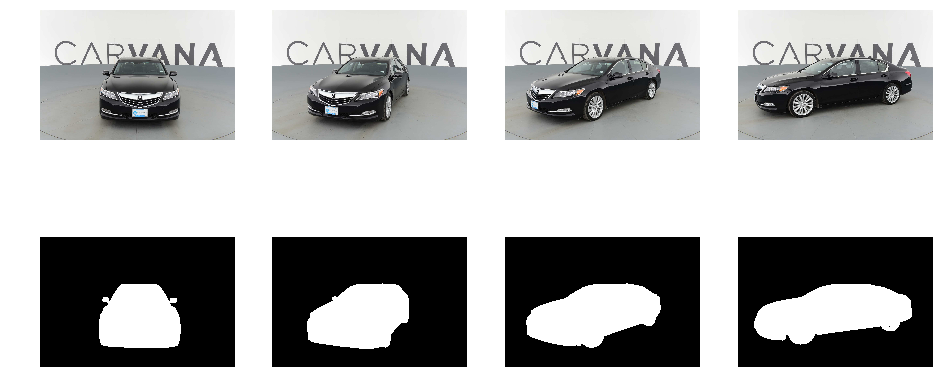

In [45]:

ip.plot(X_filenames[:4]+ Y_filenames[:4], count=-1, scale= 2.0)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val= train_test_split(X_filenames, Y_filenames, test_size= 0.2, random_state= 21)

In [51]:
print("X_train: {}".format(len(X_train)))
print("Y_train: {}".format(len(Y_train)))
print("X_val: {}".format(len(X_val)))
print("Y_val: {}".format(len(Y_val)))

X_train: 4070
Y_train: 4070
X_val: 1018
Y_val: 1018


#### Image Preprocessing

In [0]:
img_shape= (128, 128, 3)
batch_size= 3
epochs= 5